In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
df=pd.read_csv('train.csv')
df=df.drop(columns=['datetime','var2','ID'])
df=df.dropna(how='any')
df

,temperature,var1,pressure,windspeed,electricity_consumption
0,-11.4,-17.1,1003.0,571.910,216.0
1,-12.1,-19.3,996.0,575.040,210.0
2,-12.9,-20.0,1000.0,578.435,225.0
3,-11.4,-17.1,995.0,582.580,216.0
4,-11.4,-19.3,1005.0,586.600,222.0
...,...,...,...,...,...
26491,-0.7,-15.0,1009.0,51.685,225.0
26492,-2.9,-11.4,1005.0,56.105,213.0
26493,-1.4,-12.9,995.0,61.275,213.0
26494,-2.9,-11.4,996.0,67.210,210.0


In [ ]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [ ]:
y=y.reshape(len(y),1)

In [ ]:
print(X)
print("\n")
print(y)

[[ -11.4    -17.1   1003.     571.91 ]
 [ -12.1    -19.3    996.     575.04 ]
 [ -12.9    -20.    1000.     578.435]
 ...
 [  -1.4    -12.9    995.      61.275]
 [  -2.9    -11.4    996.      67.21 ]
 [  -2.1    -11.4   1009.      71.88 ]]


[[216.]
 [210.]
 [225.]
 ...
 [213.]
 [210.]
 [210.]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
nc1 = StandardScaler()
X_train=nc1.fit_transform(X_train)
X_test=nc1.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
nc2=MinMaxScaler()
y_train=nc2.fit_transform(y_train)
y_test=nc2.fit_transform(y_test)

In [ ]:
y_train

array([[0.15594059],
       [0.01732673],
       [0.12376238],
       ...,
       [0.22277228],
       [0.0990099 ],
       [0.06188119]])

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=500,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1000,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1500,activation='relu'))
ann.add(tf.keras.layers.Dense(units=2000,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1))

In [ ]:
ann.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history = ann.fit(X_train, y_train, batch_size=15, epochs=100, validation_data=(X_test, y_test))
ann.save("EC.h5")

Epoch 1/100
1325/1325 [==============================] - 42s 31ms/step - loss: 0.0134 - accuracy: 5.0185e-04 - val_loss: 0.0083 - val_accuracy: 3.0193e-04
Epoch 2/100
1325/1325 [==============================] - 41s 31ms/step - loss: 0.0059 - accuracy: 7.0002e-04 - val_loss: 0.0089 - val_accuracy: 3.0193e-04
Epoch 3/100
1325/1325 [==============================] - 41s 31ms/step - loss: 0.0059 - accuracy: 6.6275e-04 - val_loss: 0.0091 - val_accuracy: 3.0193e-04
Epoch 4/100
1325/1325 [==============================] - 41s 31ms/step - loss: 0.0059 - accuracy: 7.6413e-04 - val_loss: 0.0082 - val_accuracy: 3.0193e-04
Epoch 5/100
1325/1325 [==============================] - 41s 31ms/step - loss: 0.0057 - accuracy: 6.2311e-04 - val_loss: 0.0086 - val_accuracy: 3.0193e-04
Epoch 6/100
1325/1325 [==============================] - 41s 31ms/step - loss: 0.0058 - accuracy: 7.5305e-04 - val_loss: 0.0078 - val_accuracy: 3.0193e-04
Epoch 7/100
1325/1325 [==============================] - 41s 31ms/step

Saved Model & Graph to disk


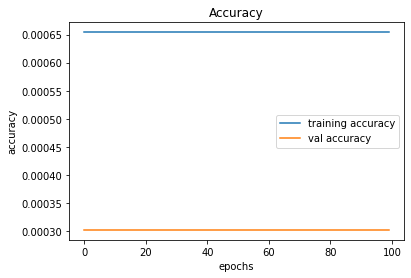

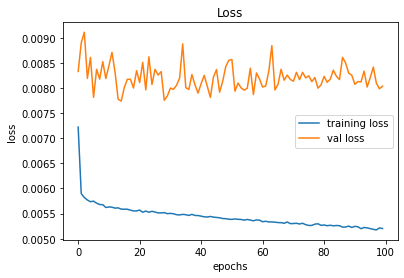

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

**Prediction of the results**

In [ ]:
model = tf.keras.models.load_model('EC.h5')
print("Loaded model from disk")

Loaded model from disk


In [149]:
test=pd.read_csv('test.csv')
id=test['ID']
test=test.drop(columns=['datetime','var2','ID'])
test=test.dropna(how='any')
test

,temperature,var1,pressure,windspeed
0,-10.0,-16.4,1011.0,263.280
1,-10.0,-20.7,1011.0,267.175
2,-10.7,-17.1,1003.0,269.555
3,-13.6,-20.7,1008.0,273.060
4,-10.7,-17.1,1006.0,1.765
...,...,...,...,...
8563,-5.7,-18.6,998.0,233.595
8564,-5.7,-17.1,995.0,238.780
8565,-7.1,-19.3,1004.0,244.325
8566,-6.4,-19.3,1008.0,247.470


In [ ]:
x=test.iloc[:,:].values
x=nc1.fit_transform(x)
x

array([[-1.75614059, -1.41850248,  2.03085213,  4.81591464],
       [-1.75614059, -1.83418512,  2.03085213,  4.89436594],
       [-1.83748236, -1.48617174,  1.3722971 ,  4.9423028 ],
       ...,
       [-1.41915325, -1.69884659,  1.45461648,  4.43413176],
       [-1.33781147, -1.69884659,  1.78389399,  4.4974769 ],
       [-1.17512793, -1.41850248,  1.20765834,  4.56051992]])

In [154]:
y_pred= model.predict(x)
y_pred=nc2.inverse_transform(y_pred)
for i in range(len(id)):
  for j in range(len(y_pred)):
      if i==j:
        print("The consumption rate for the id {0} would be => {1} joules" .format(id[i],y_pred[j]))

Streaming output truncated to the last 5000 lines.
The consumption rate for the id 15160 would be => [258.68567] joules
The consumption rate for the id 15161 would be => [283.91406] joules
The consumption rate for the id 15162 would be => [286.8332] joules
The consumption rate for the id 15163 would be => [299.0512] joules
The consumption rate for the id 15164 would be => [294.3289] joules
The consumption rate for the id 15165 would be => [332.7878] joules
The consumption rate for the id 15166 would be => [300.7069] joules
The consumption rate for the id 15167 would be => [288.9288] joules
The consumption rate for the id 15168 would be => [315.8618] joules
The consumption rate for the id 15169 would be => [382.41034] joules
The consumption rate for the id 15170 would be => [396.57114] joules
The consumption rate for the id 15171 would be => [401.55783] joules
The consumption rate for the id 15172 would be => [304.62372] joules
The consumption rate for the id 15173 would be => [349.1511